# Intro

In [2]:
import torch
import numpy as np
from tqdm.auto import tqdm
import jkutils.mpl_latex_template as mplt
import seaborn as sns
import matplotlib.pyplot as plt

Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
def plot_results_dict(plot_dict, xlabel, ylabel,
                      error_alpha=0.5, x_lim_factor=1.05, y_lim_factor=1.1,
                      legend_params={}, xlabel_params={}, ylabel_params={}, yticks_params=None,  xticks_params=None, title_params=None,
                      linewidth=1, clip_on=False, zorder=3, budget_scaling=1, xlim=None, ylim=None):
    pal = sns.color_palette('colorblind', n_colors=len(plot_dict))

    max_budget = 0
    max_metric = 0

    for i, k in enumerate(plot_dict.keys()):
        if 'label' in plot_dict[k].keys():
            label = plot_dict[k]['label']
        else:
            label = k

        budgets = plot_dict[k]['budgets'] * budget_scaling
        metrics = plot_dict[k]['cert_metrics']
        
        plt.step(budgets, metrics, label=label, color=pal[i], zorder=zorder, clip_on=clip_on, linewidth=linewidth, where='mid')

        if 'errors' in plot_dict[k].keys():
            errors = plot_dict[k]['errors']
            plt.fill_between(budgets, metrics-errors, metrics+errors, alpha=error_alpha, color=pal[i], zorder=zorder, clip_on=clip_on, linewidth=0, step="mid")

        #print(f'Max error for {k} is {errors.max()}')

        max_budget = max(max_budget, budgets.max())
        max_metric = max(max_metric, metrics.max())

    if xlim is not None:
        plt.xlim(0, xlim)
    elif x_lim_factor is not None:
        plt.xlim(0, x_lim_factor * max_budget)
    else:
        plt.xlim(left=0)

    if ylim is not None:
        plt.ylim(0, ylim)
    elif y_lim_factor is not None:
        plt.ylim(0, y_lim_factor * max_metric)
    else:
        plt.ylim(bottom=0)

    plt.xlabel(xlabel, **xlabel_params)
    plt.ylabel(ylabel, **ylabel_params)

    if title_params is not None:
        plt.title(**title_params)

    if yticks_params is not None:
        plt.yticks(**yticks_params)

    if xticks_params is not None:
        plt.xticks(**xticks_params)

    plt.legend(**legend_params)

# Plotting

In [5]:
import seml
df_results = seml.get_results('graph_cert_piPPNP', to_data_frame=True, fields=['config', 'stats'])
print(len(df_results))
if len(df_results) > 0:
    save_dir = df_results.iloc[0]["config.conf.save_dir"] + "/" + df_results.iloc[0]["config.db_collection"] + "_"

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

194


In [5]:
path = "anon/plots/piPPNP"

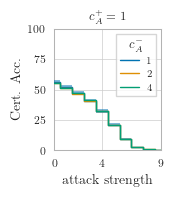

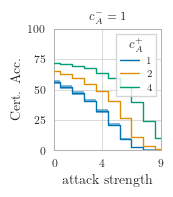

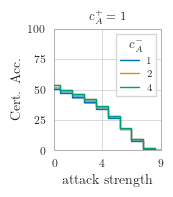

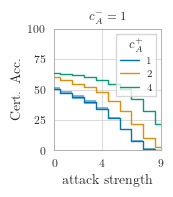

In [6]:
format = 'pgf'
for dataset in ["Cora", "Citeseer"]:
    cond = (df_results['config.hparams.threat_model'] == 'add_rem') & \
        (df_results['config.hparams.dataset'] == dataset) 
    df = df_results[cond]
    filename = f"piPPNP-{dataset}"

    # ca = 1
    d = {}
    cond2 = (df['config.hparams.cd'] == 1) & (df['config.hparams.ca'] == 1) 
    id = df[cond2]['config.overwrite'].item()
    a = torch.load(f"anon/results/pippnp/graph_cert_piPPNP_{id}")
    n = a['local']['cert_accs'][0].shape[0]
    d[1] = {
                'budgets': np.arange(n),
                'cert_metrics': a['local']['cert_accs'][0],
                'errors': a['local']['cert_accs'][1],
    }

    cond2 = (df['config.hparams.cd'] == 2) & (df['config.hparams.ca'] == 1) 
    id = df[cond2]['config.overwrite'].item()
    a = torch.load(f"anon/results/pippnp/graph_cert_piPPNP_{id}")
    n = a['local']['cert_accs'][0].shape[0]
    d[2] = {
                'budgets': np.arange(n),
                'cert_metrics': a['local']['cert_accs'][0],
                'errors': a['local']['cert_accs'][1],
    }

    cond2 = (df['config.hparams.cd'] == 4) & (df['config.hparams.ca'] == 1) 
    id = df[cond2]['config.overwrite'].item()
    a = torch.load(f"anon/results/pippnp/graph_cert_piPPNP_{id}")
    n = a['local']['cert_accs'][0].shape[0]
    d[4] = {
                'budgets': np.arange(n),
                'cert_metrics': a['local']['cert_accs'][0],
                'errors': a['local']['cert_accs'][1],
    }
    d_tmp = d

    sns.set_theme()
    mplt.newfig(width=0.25, ratio_yx=1.15)
    plot_results_dict(d, 'attack strength', 'Cert. Acc.', legend_params={'fontsize': 7, 'title_fontsize': 9, 'title': '$c_A^-$'}, ylim=1, xlim=9, clip_on=True, title_params={'label': '$c_A^+=1$', 'fontsize': 9},
                    yticks_params={'ticks': [0, 0.25, 0.5, 0.75, 1.0], 'labels': ['0%', '25%', '50%', '75%', '100%']},  xticks_params={'ticks': [0,4,9]})

    mplt.savefig(path+filename+"-A", format=format, close_fig='True', preview='png', tight={'pad': 0.55})


    d = {}
    cond2 = (df['config.hparams.cd'] == 1) & (df['config.hparams.ca'] == 1) 
    id = df[cond2]['config.overwrite'].item()
    a = torch.load(f"anon/results/pippnp/graph_cert_piPPNP_{id}")
    n = a['local']['cert_accs'][0].shape[0]
    d[1] = {
                'budgets': np.arange(n),
                'cert_metrics': a['local']['cert_accs'][0],
                'errors': a['local']['cert_accs'][1],
    }

    cond2 = (df['config.hparams.cd'] == 1) & (df['config.hparams.ca'] == 2) 
    id = df[cond2]['config.overwrite'].item()
    a = torch.load(f"anon/results/pippnp/graph_cert_piPPNP_{id}")
    n = a['local']['cert_accs'][0].shape[0]
    d[2] = {
                'budgets': np.arange(n),
                'cert_metrics': a['local']['cert_accs'][0],
                'errors': a['local']['cert_accs'][1],
    }

    cond2 = (df['config.hparams.cd'] == 1) & (df['config.hparams.ca'] == 4) 
    id = df[cond2]['config.overwrite'].item()
    a = torch.load(f"anon/results/pippnp/graph_cert_piPPNP_{id}")
    n = a['local']['cert_accs'][0].shape[0]
    d[4] = {
                'budgets': np.arange(n),
                'cert_metrics': a['local']['cert_accs'][0],
                'errors': a['local']['cert_accs'][1],
    }

    sns.set_theme()
    mplt.newfig(width=0.25, ratio_yx=1.15)
    plot_results_dict(d, 'attack strength', 'Cert. Acc.', legend_params={'fontsize': 7, 'title_fontsize': 9, 'title': '$c_A^+$'}, ylim=1, xlim=9, clip_on=True, title_params={'label': '$c_A^-=1$', 'fontsize': 9},
                    yticks_params={'ticks': [0, 0.25, 0.5, 0.75, 1.0], 'labels': ['0%', '25%', '50%', '75%', '100%']}, xticks_params={'ticks': [0,4,9]})

    mplt.savefig(path+filename+"-B", format=format, close_fig='True', preview='png', tight={'pad': 0.55})
